# Project: Credit Card Customer Segmentation

## Problem Statement
The Thera bank recently saw a steep decline in the number of users of their credit card. Credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

## Objectives
1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

## <a id = "TOC"></a> Table of Contents
- <a href = #import>Import Libraries and Load Dataset </a>

- <a href = #eda>EDA</a> 
    - <a href = #univariate>Univariate Analysis</a>
    - <a href = #bivariate>Bivariate Analysis</a>
    - <a href = #eda-insights>Summary EDA Insights</a>
- <a href = #data-pre>Data Pre-Processing</a>
    - <a href = #feature>Feature Engineering</a>
    - <a href = #missing>Missing Value Treatment</a>
    - <a href = #outlier>Outlier Treatment</a>
    - <a href = #split>Split Data</a>

- <a href = #model>Model Building</a> 
    - <a href = #eval-criteria>Model Evaluation Criteria</a>
    - <a href = #initial-models>Create Initial Models</a>
    - <a href = #imbalance>Treat Imbalances</a>
    - <a href = #reg>Regularization</a>

- <a href = #hyperparameter>Hyperparameter Tuning</a>

- <a href = #performance>Model Performance Evaluation</a>

- <a href = #conclusion>Conclusion and Business Recommendations</a>

## Data Dictionary
* **CLIENTNUM**: Client number. Unique identifier for the customer holding the account
* **Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then 1 else 0
* **Customer_Age**: Age in Years
* **Gender**: Gender of the account holder
* **Dependent_count**: Number of dependents
* **Education_Level**: Educational Qualification of the account holder
* **Marital_Status**: Marital Status of the account holder
* **Income_Category**: Annual Income Category of the account holder
* **Card_Category**: Type of Card
* **Months_on_book**: Period of relationship with the bank
* **Total_Relationship_Count**: Total no. of products held by the customer
* **Months_Inactive_12_mon**: No. of months inactive in the last 12 months
* **Contacts_Count_12_mon**: No. of Contacts in the last 12 months
* **Credit_Limit**: Credit Limit on the Credit Card
* **Total_Revolving_Bal**: Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months)... Open to Buy is AKA Average Available Credit
* **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct**: Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1)... Total transaction amount in 4th quarter / Total transaction amount in 1st quarter.
* **Avg_Utilization_Ratio**: Average Card Utilization Ratio

# <a id = "import"></a>1. Import Libraries and Load Dataset

## Import Relevant Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import core libraries
import numpy as np
import pandas as pd

# Import libraries for data visualization 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries to tune model, get metric scores, and split data
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import library to impute null values
from sklearn.impute import KNNImputer

# Import libraries to create pipelines
from sklearn.pipeline import Pipeline, make_pipeline

# Import libraries for model building  
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier)
from xgboost import XGBClassifier

# Import libraries for treating imbalances
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Read the Data File

In [2]:
# Name of the file to read
file = 'BankChurners.csv'

# Read the file and assign to df variable
df = pd.read_csv(file)

### Check Head, Tail, and Shape

In [3]:
# View the first 5 rows of the data
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [4]:
# View the last 5 rows of the data
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

In [5]:
# Check the number of rows and columns
df.shape

(10127, 21)

#### Observations
* We have 10,127 records in the data with 21 columns 
* This should be plenty of data for a good model if the features are independent and add value
* Attrition_Flag is the target variable

### Check Column Data Types

In [6]:
# Check the data types and non-null count for each column in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Observations
* Appears that the data does not have any null values (all have 10,127 non-null count)
* Will need to convert some columns to "category" Dtype

### Check Number of Unique Values

In [7]:
# Check the number of unique values in each column
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

#### Observations
* All CLIENTNUM values (customer IDs) are unique, so I can drop the column
* Attrition_Flag only has 2 values, which is what is expected
* Only 2 gender values, which means no bad data in the column
* Mix of categorical and numeric columns

In [8]:
# Drop CLIENTNUM column because it won't add value to the models
df.drop('CLIENTNUM', axis=1, inplace=True)

### Fix Dtypes Where Necessary

In [9]:
# Convert columns with categorical data to Dtype "category" 
df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Dependent_count'] = df['Dependent_count'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Income_Category'] = df['Income_Category'].astype('category')
df['Card_Category'] = df['Card_Category'].astype('category')
df['Total_Relationship_Count'] = df['Total_Relationship_Count'].astype('category')
df['Months_Inactive_12_mon'] = df['Months_Inactive_12_mon'].astype('category')
df['Contacts_Count_12_mon'] = df['Contacts_Count_12_mon'].astype('category')

In [10]:
# Check Dtypes after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

#### Observations
* Memory usage has been reduced almost 50%
* Columns appear to be in the correct Dtype now

### Check for Null Values

In [11]:
# Display how many null values we have in each column
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### Observations
* No null values in the data

### Check the Summary of the Data

In [12]:
# Check the central tendency, frequency, range, etc. for numeric columns
# Transpose for ease of viewing
df.describe().T

count         mean          std     min       25%  \
Customer_Age           10127.0    46.325960     8.016814    26.0    41.000   
Months_on_book         10127.0    35.928409     7.986416    13.0    31.000   
Credit_Limit           10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal    10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy        10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1   10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt        10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct         10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1    10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio  10127.0     0.274894     0.275691     0.0     0.023   

                            50%        75%        max  
Customer_Age             46.000     52.000     73.000  
Months_on_book           36.000     40.000     56.000  
Credit_Limit           4549.000  11067.500  34516.000  
Total_Revolving_Bal    1276.000   1784.000   2517.000  
Avg_Open_To_Buy        3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1      0.736      0.859      3.397  
Total_Trans_Amt        3899.000   4741.000  18484.000  
Total_Trans_Ct           67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1       0.702      0.818      3.714  
Avg_Utilization_Ratio     0.176      0.503      0.999

#### Observations
* Customers are 26 to 73 years old, with average age around 46. Appears to be a fairly normal distribution. 
* These customers have been with the bank 13 to 56 months, with the average length of relationship just under 36 months. Also appears to have a fairly normal distribution. 
* Credit limit has a wide range and appears to have a right skew. This is likely normal and represents the real world. 
* Revolving balance ranges from 0 to 2,517 with an average of 1,163. Appears to be fairly normal distribution. 
* Average Open to Buy has similar range and distribution as Credit Limit. I assume these two might be highly correlated. 
* Total Transaction Amount has a large range of 510 to 18,484 with an average of 4,404, so there are likely some outliers on the high side. 
* Total Transaction Count also has a large range of 10 to 139 with an average around 65, so also has outliers on the high side. 
* The Q4 over Q1 columns are very similar and likely too highly correlated. Both have a range around 0 to 3 and an average around 0.7. It's unclear if the Q4 and Q1 are in the same calendar year, or if this is meant to represent Q4 of previous year and Q1 of current year (for example). In my experience, Q4 previous year compared to Q1 current year is a more common comparison, but I also typically see it as Q1 over Q4 in that situation. Regardless, the average below 1 indicates that on average, both transaction count and transaction amount are lower in Q4 than in Q1 for most customers. 
* Avg Utilizaiton Ratio is likely correlated with Open to Buy (should be inversley related). Avg Utilization has a range of 0 to just under 1, which is to be expected. On average, customers use around 27% of available credit, but the median is 17.6%, so there are outliers causing a right skew. 

### Check Count Unique Categories within Categoricial Variables

In [13]:
# Make a list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

# Print the count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platin

#### Observations
* The target variable is imbalanced. Only around 16% of customers in this data set attrited. I will likely have to do some upsampling or downsampling later because of this. 
* Some of the other columns have some imbalance, but nothing looks out of the ordinary or unusual. 
* I might want to combined Divorced with Single, but for now I'm choosing to leave it. 
* Some columns have "unknown" values. Unfortunately, in each case there are a significant number of unknown values, so simply imputing the mode or something doesn't seem like a good idea because it will add too much synthetic data. I'm going to leave the unknown values as is for now and run the models to see if I need to adjust or not. 
* By far, most customers have a Blue card. Only 20 have a Platinum level card.

## Initial Feature Engineering

### Amount Per Transaction Column

In [14]:
# Create a Amount per Transaction column 
df['amt_per_trans'] = df['Total_Trans_Amt']/df['Total_Trans_Ct']

In [15]:
df.describe().T

count         mean          std          min  \
Customer_Age           10127.0    46.325960     8.016814    26.000000   
Months_on_book         10127.0    35.928409     7.986416    13.000000   
Credit_Limit           10127.0  8631.953698  9088.776650  1438.300000   
Total_Revolving_Bal    10127.0  1162.814061   814.987335     0.000000   
Avg_Open_To_Buy        10127.0  7469.139637  9090.685324     3.000000   
Total_Amt_Chng_Q4_Q1   10127.0     0.759941     0.219207     0.000000   
Total_Trans_Amt        10127.0  4404.086304  3397.129254   510.000000   
Total_Trans_Ct         10127.0    64.858695    23.472570    10.000000   
Total_Ct_Chng_Q4_Q1    10127.0     0.712222     0.238086     0.000000   
Avg_Utilization_Ratio  10127.0     0.274894     0.275691     0.000000   
amt_per_trans          10127.0    62.612717    26.404198    19.137931   

                               25%          50%           75%           max  
Customer_Age             41.000000    46.000000     52.000000     73.000000  
Months_on_book           31.000000    36.000000     40.000000     56.000000  
Credit_Limit           2555.000000  4549.000000  11067.500000  34516.000000  
Total_Revolving_Bal     359.000000  1276.000000   1784.000000   2517.000000  
Avg_Open_To_Buy        1324.500000  3474.000000   9859.000000  34516.000000  
Total_Amt_Chng_Q4_Q1      0.631000     0.736000      0.859000      3.397000  
Total_Trans_Amt        2155.500000  3899.000000   4741.000000  18484.000000  
Total_Trans_Ct           45.000000    67.000000     81.000000    139.000000  
Total_Ct_Chng_Q4_Q1       0.582000     0.702000      0.818000      3.714000  
Avg_Utilization_Ratio     0.023000     0.176000      0.503000      0.999000  
amt_per_trans            47.514573    55.794872     65.476673    190.193182

#### Observations
* The amount spent per transaction ranges from 19 to 190, with an average of just under 63 per transaction. 
* There is a right skew to the amt_per_trans data because of the skew in the Total_Trans_Amt column. 

<a href = #TOC>Back to Top</a>

# <a id = "eda"></a>2. EDA

### Establish Target Variable

In [16]:
# Create a variable for the target column for use throughout
target = 'Attrition_Flag'

## <a id = "univariate"></a>Univariate Analysis

### Univariate Analysis: Numeric Features

In [17]:
# Define a method to show the boxplot and histogram for each numeric column... 
# in a stacked presentation for easier review of distribution and central tendency

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid is = 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # Create a boxplot with a star to indicate the mean value of the column
    sns.histplot(x=feature, kde=False, ax=ax_hist2) # Create a histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

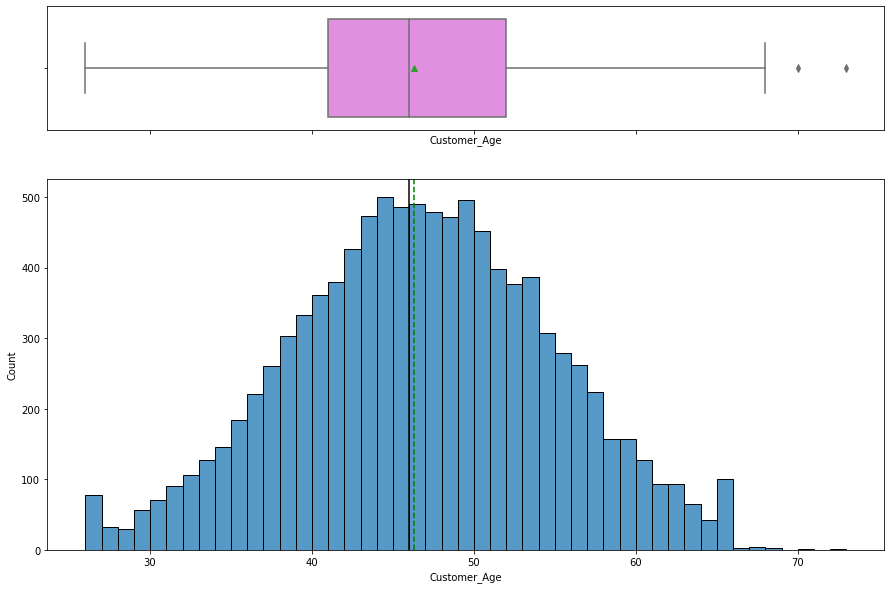

In [18]:
# Run the function to create a boxplot and distplot for each numeric column
histogram_boxplot(df['Customer_Age'])

#### Observations
* Customer age in this data set has a normal distribution
* Average age is just over 45
* Only a couple of outliers over 70

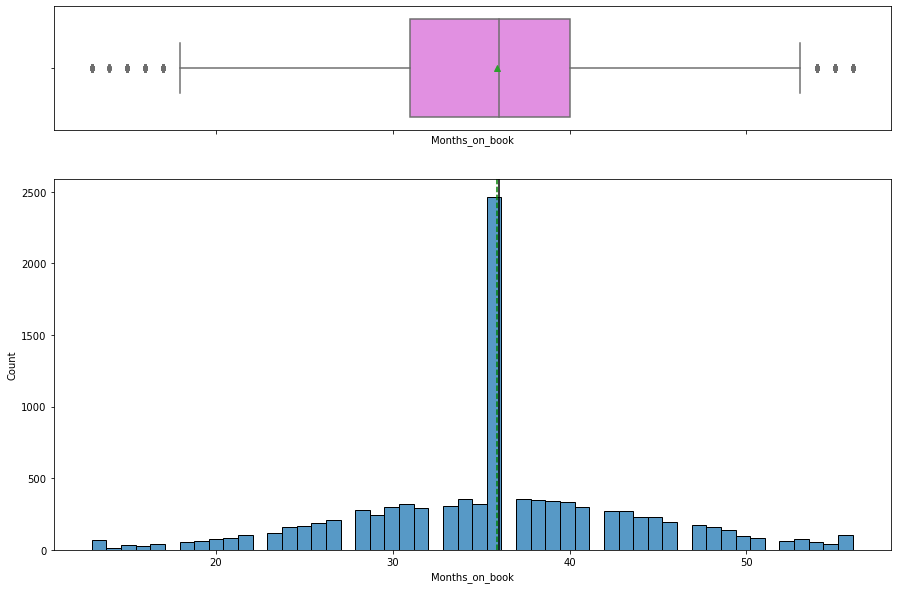

In [19]:
histogram_boxplot(df['Months_on_book'])

#### Observations
* Months on book has a normal distribution with a very high median around 35 months
* The vast majority of customers in this dataset have had their credit card for 35 months, but the full range is around 5 to 60 months

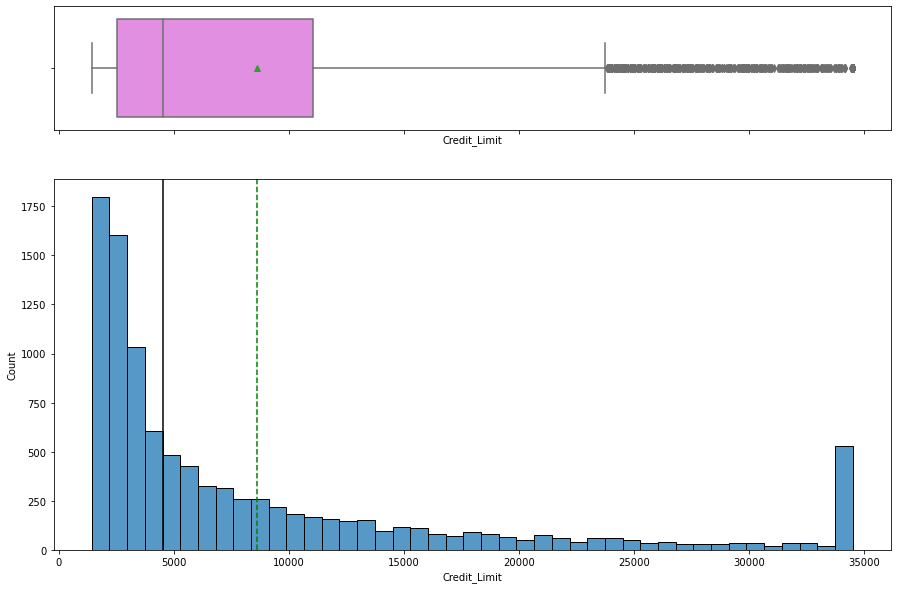

In [20]:
histogram_boxplot(df['Credit_Limit'])

#### Observations
* Most customers have a credit limit under 5,000
* A small group has what appears to be a maxiumum credit limit, just under 35,000
* Generally, the higher the credit limit the fewer the customers who have it. 

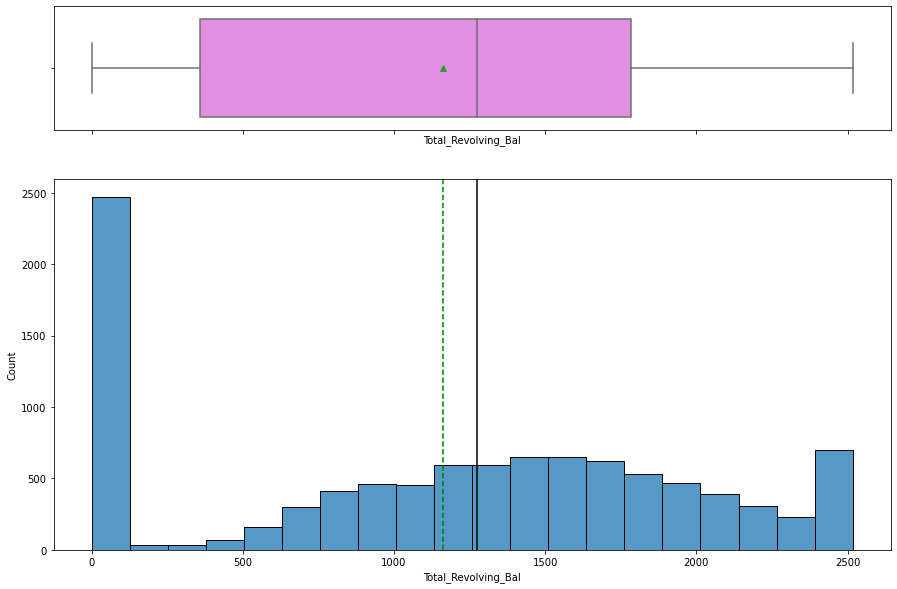

In [21]:
histogram_boxplot(df['Total_Revolving_Bal'])

#### Observations
* Most customers have no revolving balance
* A small group of customers carry a high revolving balance around 2,500
* Between those two extremes, there is a fairly normal distribution

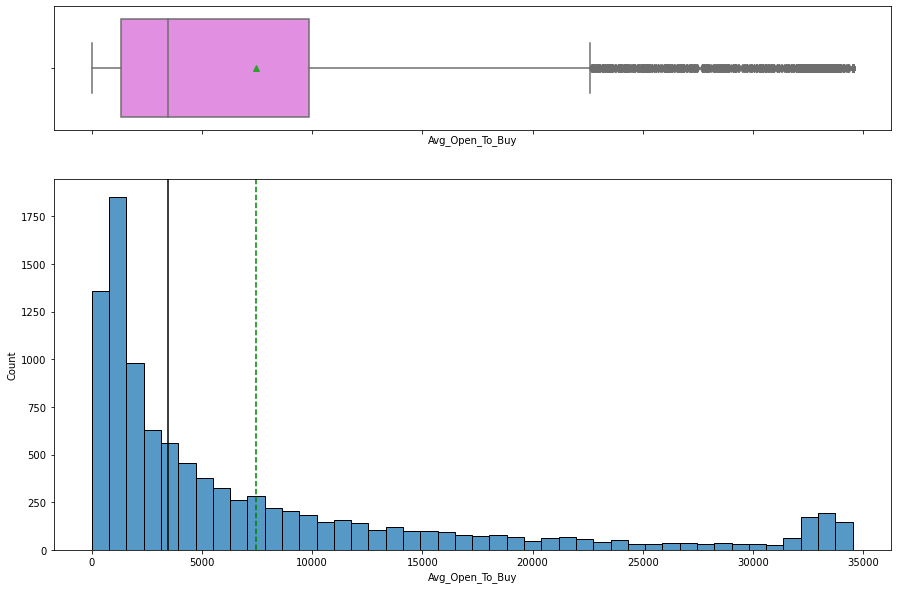

In [22]:
histogram_boxplot(df['Avg_Open_To_Buy'])

#### Observations
* Most customers have lower average open to buy (under 5,000)
* Appears to be a small group of customers with a high average open to buy between 30,000 and 35,000
* The distribution is very similar to the Credit Limit data
* I need to do some bi-variate analysis on this to understand relationship with credit limit, card type, etc. 

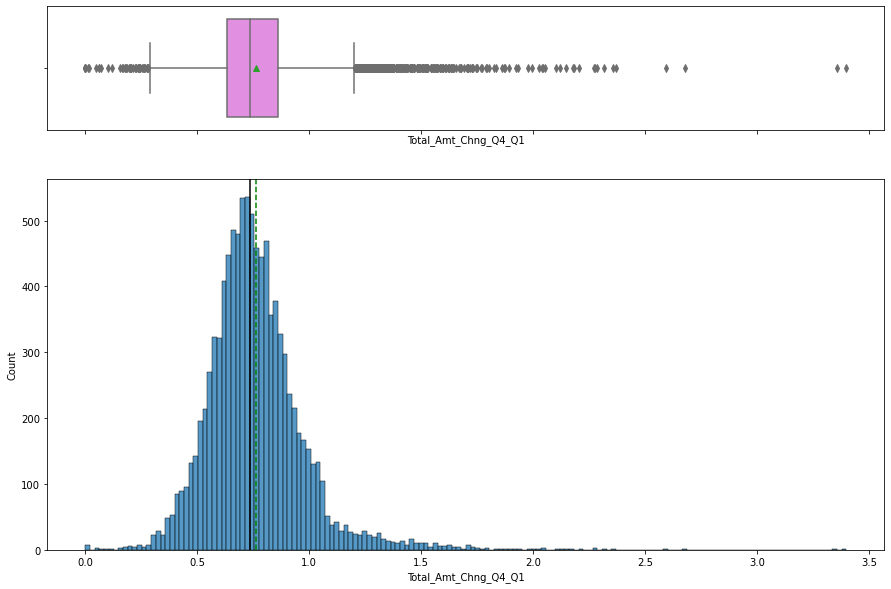

In [23]:
histogram_boxplot(df['Total_Amt_Chng_Q4_Q1'])

#### Observations
* The change in the total amount spent between Q4 and Q1 has a normal distribution with some outliers over 1.2
* Most customers charged less in Q4 than in Q1 (average around 70% less)

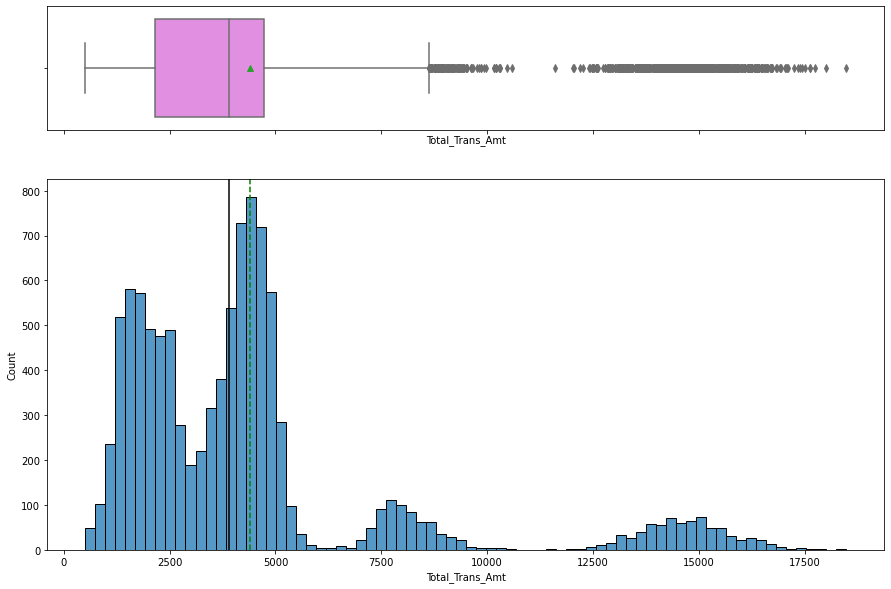

In [24]:
histogram_boxplot(df['Total_Trans_Amt'])

#### Observations
* The total transaction amount in past 12 months has an odd distribution with 4 distinct curves.
* I believe we might have a problem with card type or some other factor. I will explore more in bi-variate analysis. 

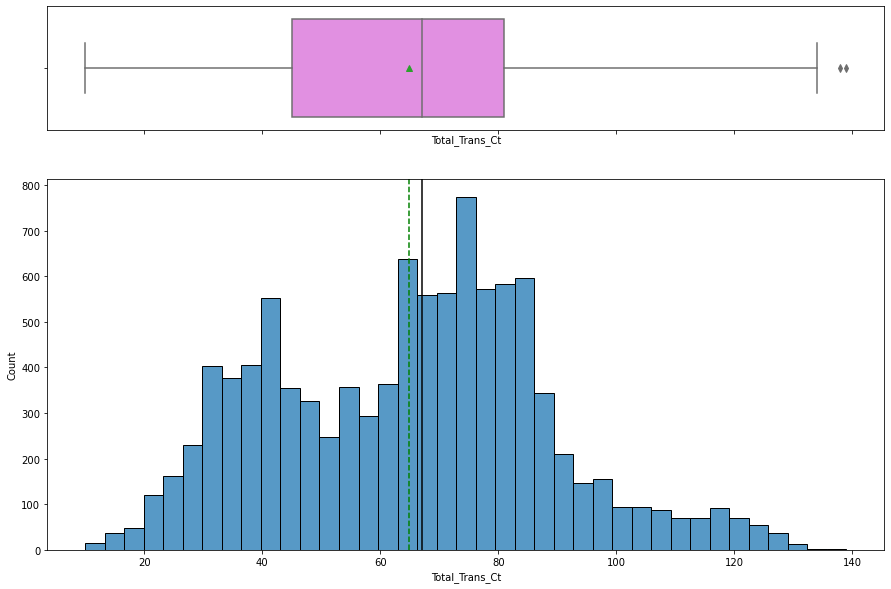

In [25]:
histogram_boxplot(df['Total_Trans_Ct'])

#### Observations
* Total transcation count has a fairly normal distribution with a small additional peak around 40 transactions in the past year. 

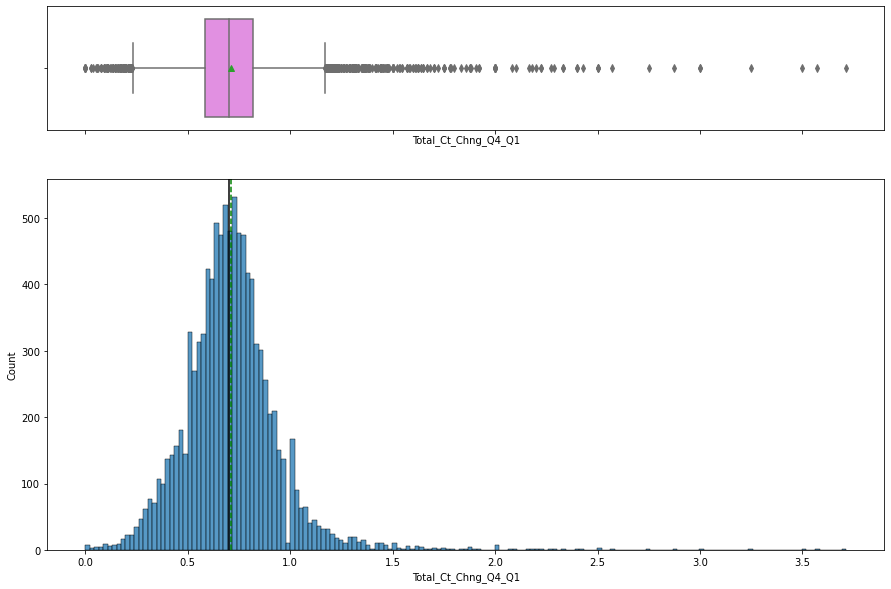

In [26]:
histogram_boxplot(df['Total_Ct_Chng_Q4_Q1'])

#### Observations
* Most people had fewer transactions in Q4 than Q1 (average around 70% fewer). 
* There are a lot of outliers of customers who had more transactions in Q4 (values over 1.2 considered outliers).

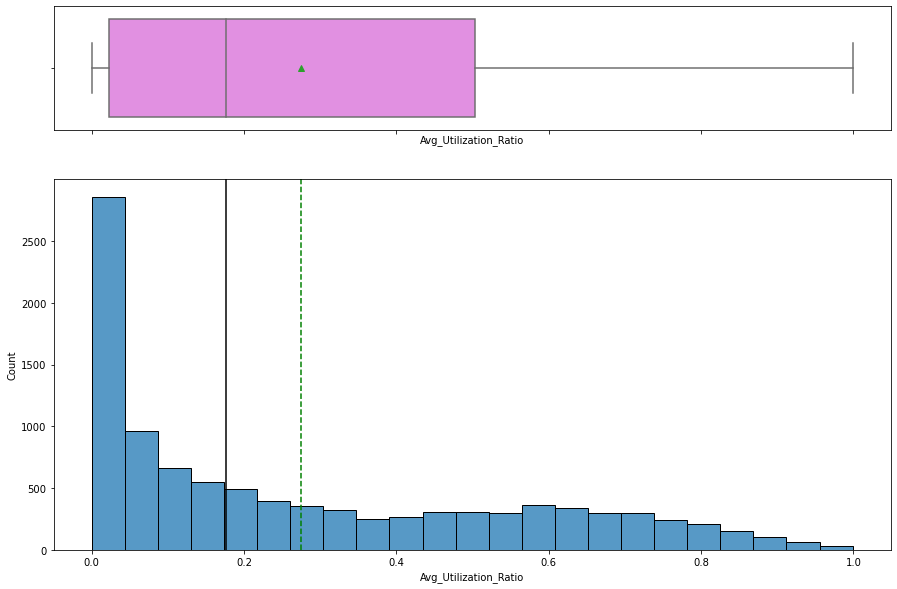

In [27]:
histogram_boxplot(df['Avg_Utilization_Ratio'])

#### Observations
* Most customers have a very low utilization ratio (most are close to 0)
* Between 0.2 and 1 utilization ratio, there is a fairly even spread of customers (just under 500 each bin), but it trails off as it gets closer to 1.

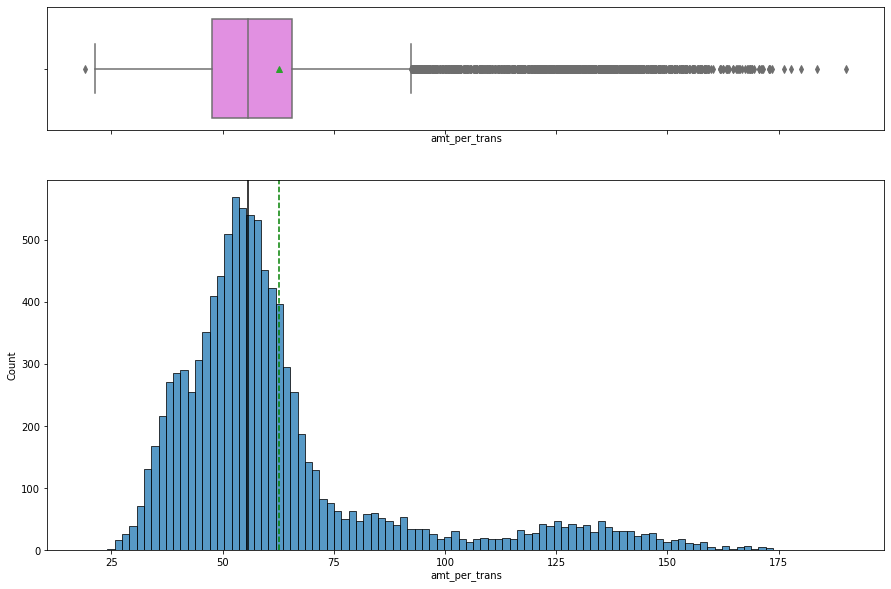

In [28]:
histogram_boxplot(df['amt_per_trans'])

#### Observations
* This column has a right skew similar to (and like caused by) the Total_Trans_Amt column, but the shape of the right tail is different. This average per transaction data has one hump between 100 and 150, where the Total_Trans_Amt has two humps in the right tail. Also, this average per transaction data has a single bell curve shape between 25 and 100, whereas the Total Trans Amt column has two humps around the median.
* I will explore this more in the bi-variate analysis to see if there's any obvious causes

### Univariate Analysis: Categorical Features

In [29]:
# Create a function that will create barplots annotated with percentages 
# for each category column

def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(8,6)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percentage on top of each bar
        
    plt.show() # show the plot

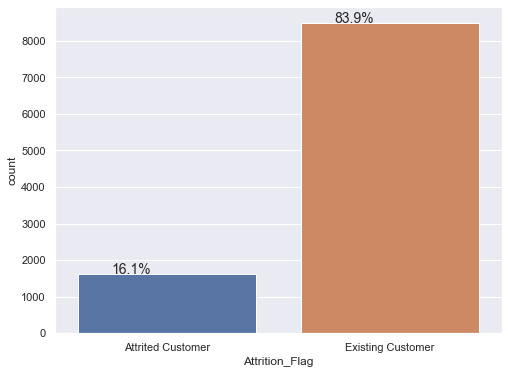

In [30]:
# Run the function to create a barplot with annotated percentages
perc_on_bar(df[target])

#### Observations
* Most customers in this data set did not attrit 
* Will probably need to deal with this imbalance in the target variable during model building

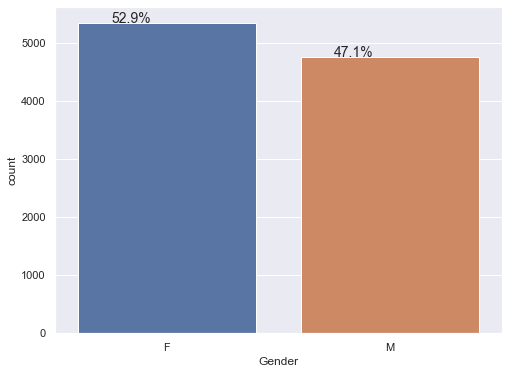

In [31]:
perc_on_bar(df['Gender'])

#### Observations
* Fairly equal distribution of men and women
* A little over half of the customers in this data set are women

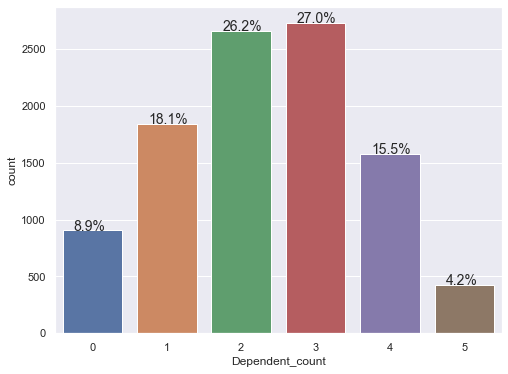

In [32]:
perc_on_bar(df['Dependent_count'])

#### Observations
* Customers in this data set have between 0 and 5 dependents, which seems reasonable
* Most customers have 2 or 3 dependents

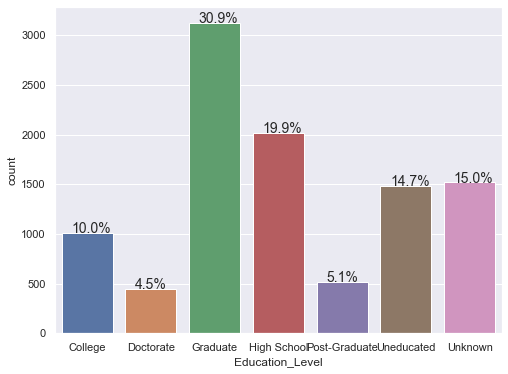

In [33]:
perc_on_bar(df['Education_Level'])

#### Observations
* Somewhat surprising that the most common education level is Graduate degree. This is not consistent with the general population. 
* Fairly high number of Uneducated customers 14.7%
* Fairly high number of Unknowns in the data set 15%

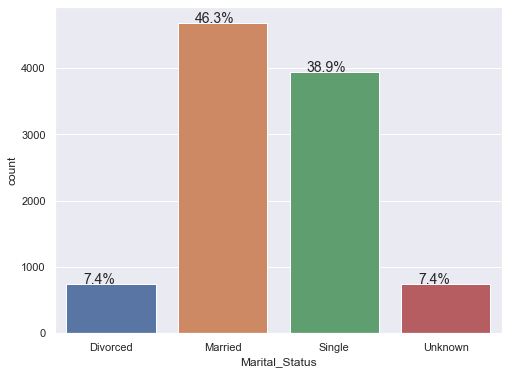

In [34]:
perc_on_bar(df['Marital_Status'])

#### Observations
* More customers are married than single
* Number of customers who are married and unmarried (single + divorced) is about equal
* I will leave divorced as its own category for now, because divorce might be a reason people cancel a credit care (if it was a joint card they had with a spouse)

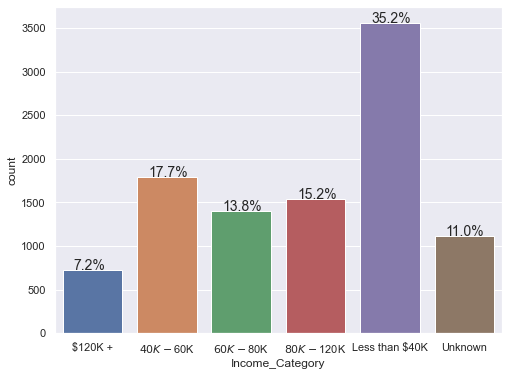

In [35]:
perc_on_bar(df['Income_Category'])

#### Observations
* Most customers have less than 40k annual income
* Smallest group is the 120k+ 
* Pretty significant number of unknown incomes (11%)

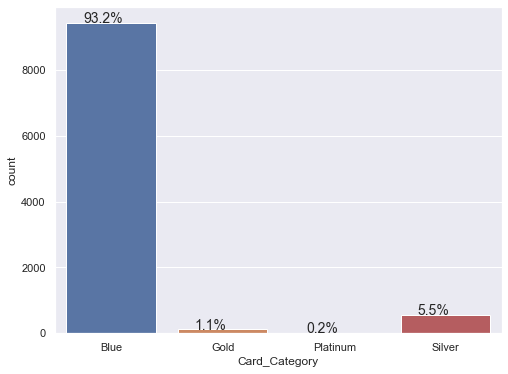

In [36]:
perc_on_bar(df['Card_Category'])

#### Observations
* Almost all customers in this data set have the Blue card (93.2%)
* The card types seem to become more exclusive from Blue, Silver, Gold, Platinum (which is typical)
* Very few customers have a Platinum card (0.2%)

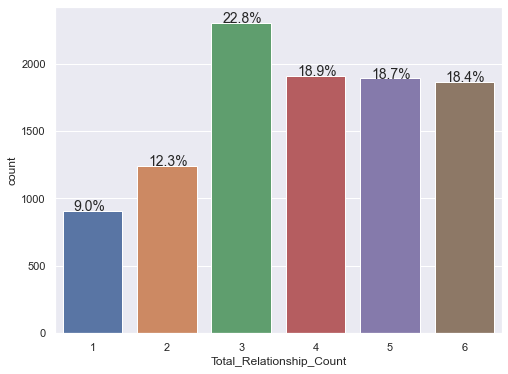

In [37]:
perc_on_bar(df['Total_Relationship_Count'])

#### Observations
* Customers in this data set have between 1 and 6 relationships with the bank
* Most customers have 3 to 6 relationships

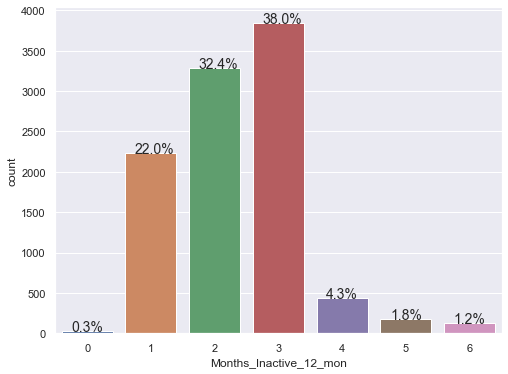

In [38]:
perc_on_bar(df['Months_Inactive_12_mon'])

#### Observations
* Only a very small number of customers were active all 12 months
* Most were inactive for 1 to 3 months during the year

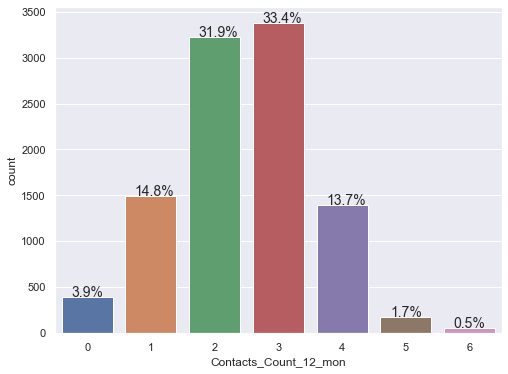

In [39]:
perc_on_bar(df['Contacts_Count_12_mon'])

#### Observations
* Number of contacts in last 12 months has a fairly normal distribution between 0 and 6
* Most customers had 2 or 3 contacts

<a href = #TOC>Back to Top</a>

## <a id = "bivariate"></a>Bivariate Analysis

### Bivariate Analysis: Correlation Heatmap

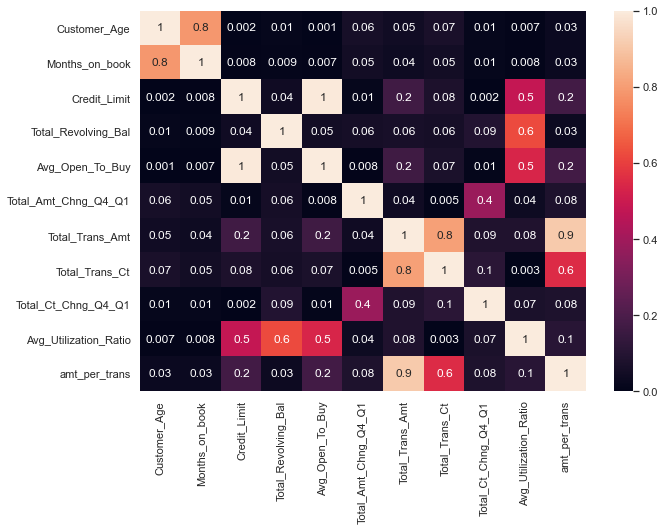

In [40]:
# Create a correlation heatmap to check for highly correlated features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr().abs(),annot=True,vmin=0,vmax=1,fmt='.1g')
plt.show()

#### Observations
* Months on Book and Customer Age have high correlation
* Credit Limit and Average Open to Buy have a very high correlation
* Total Transaction Count and Total Transaction Amount have a high correlation
* Total Transaction Amount has a high correlation with the column I created, Amount per Transaction. 
* Total Transaction Count has a moderate correlation with the column I created, Amount per Transaction. 
* Average Utilization Ratio has a moderate high correlation with Total Revolving Balance
* Average Utilization Ratio has some correlation with Credit Limit and Average Open to Buy

I'm choosing to use a correlation threshold of >= 0.9 to decide which to drop

In [41]:
# Credit_Limit has average correlation of 0.1158
# Avg_Open_To_Buy has average correlation of 0.1162
# Dropping Avg_Open_To_Buy because it has a slightly higher average correlation and is too highly correlated with Credit_Limit
df.drop('Avg_Open_To_Buy', axis=1, inplace=True)

In [42]:
# Since I created amt_per_trans and it is too highly correlated with Total_Trans_Amt, I'm dropping it
df.drop('amt_per_trans', axis=1, inplace=True)

### Bivariate Analysis: Numeric Pairplot

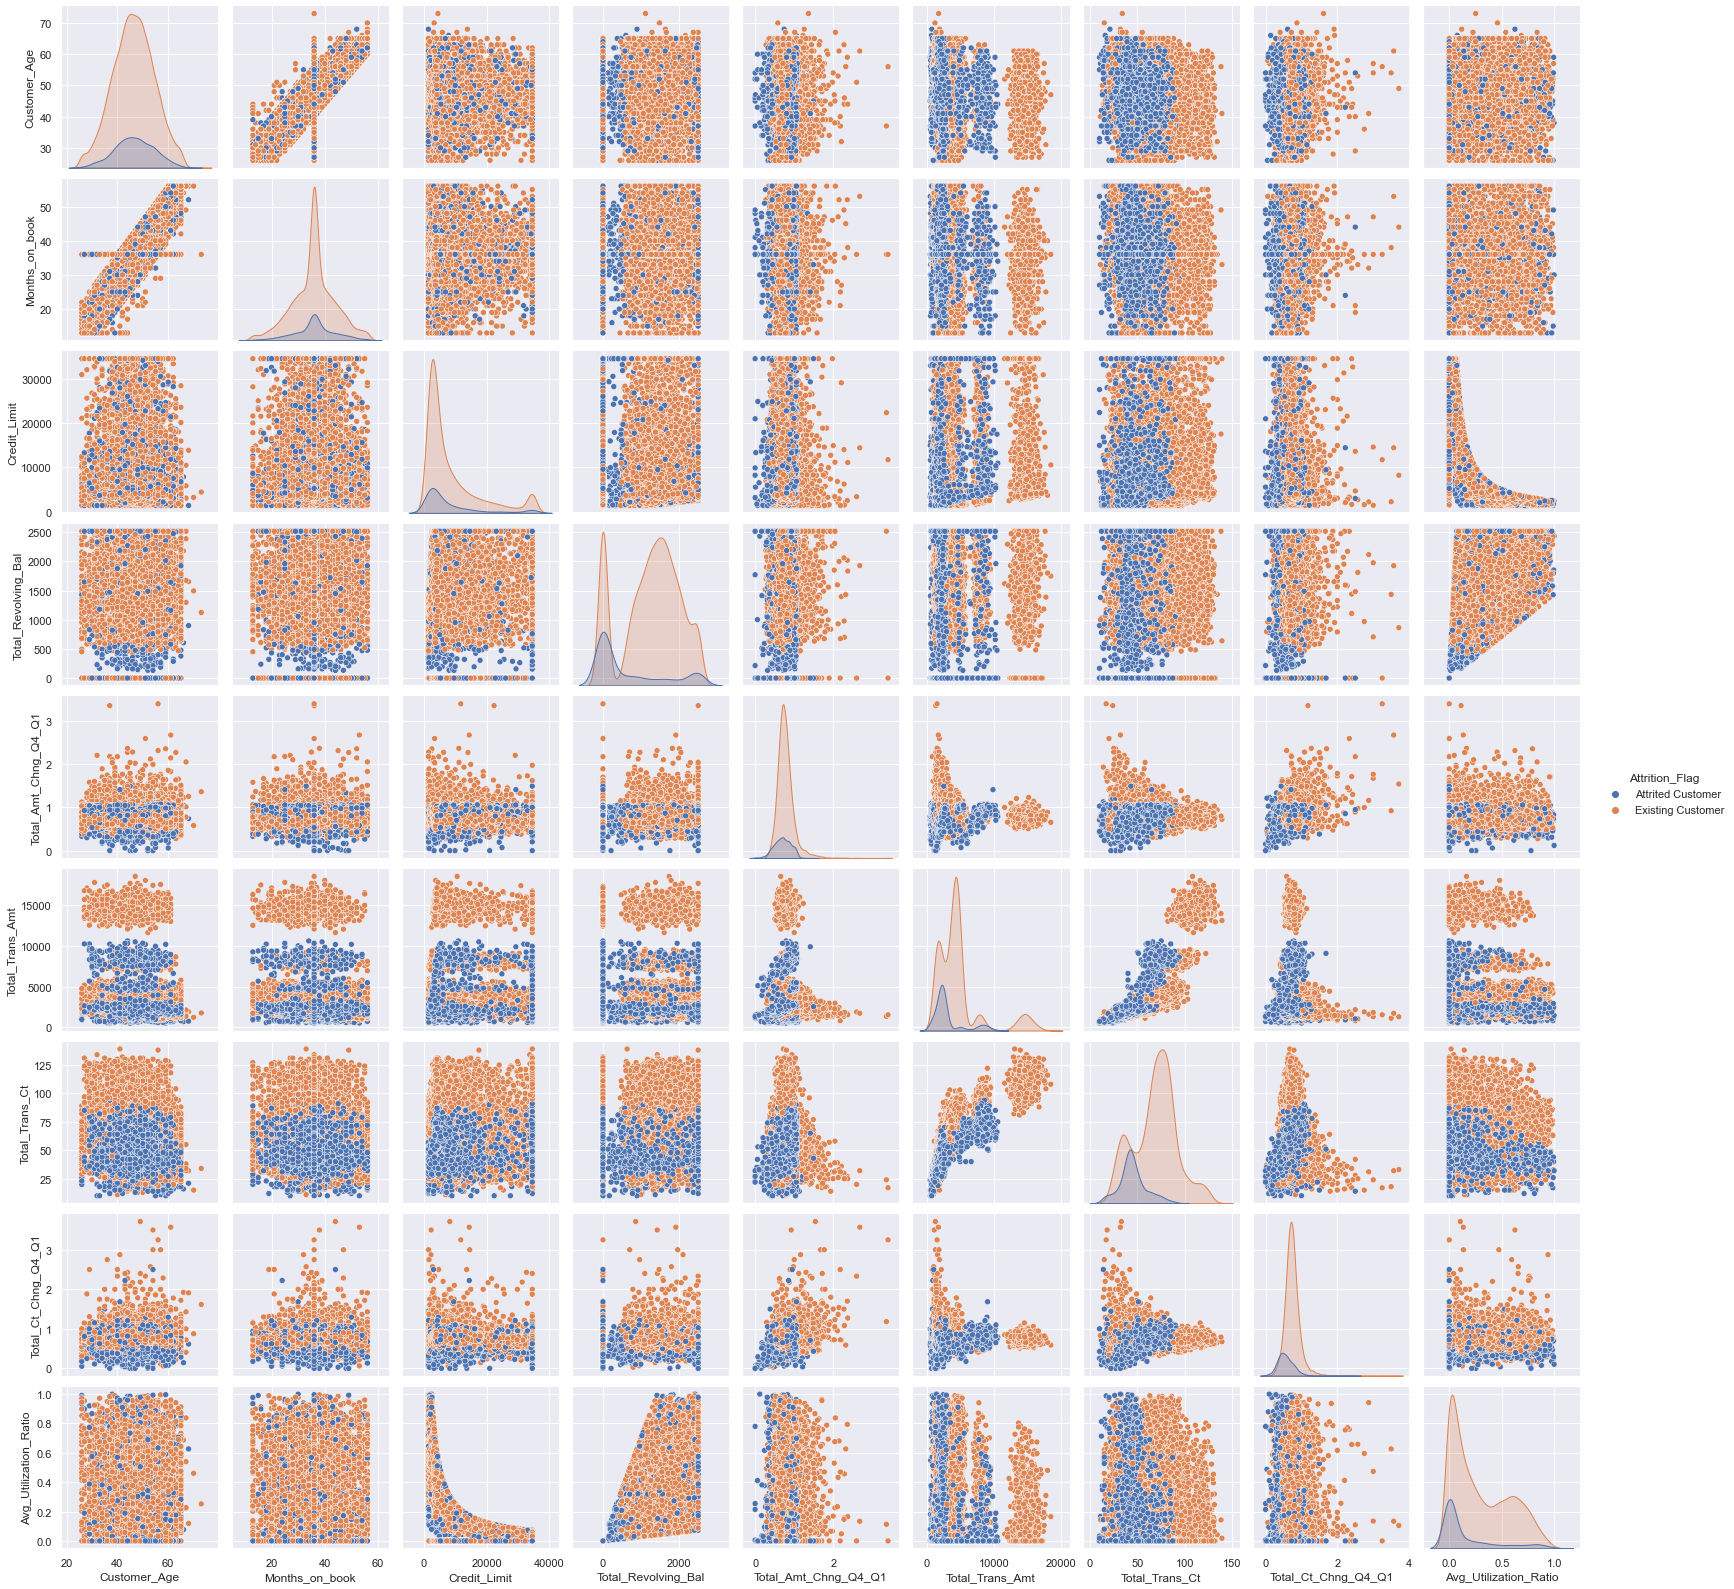

In [43]:
# Create a pairplot to view relationships between numeric features
# Hue by the dependent variable
sns.pairplot(df,hue=target)
plt.show()

#### Observations
* Months on Book and Customer Age are almost identical 
* Most of the customers who attrited had a low Total_Revolving_Bal, while existing customers have both a low and high
* Customers who attrited appear to have lower Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chang_Q4_Q1, and Avg_Utilization_Ratio than Existing Customers
* As Credit_Limit increase, Avg_Utilization_Ratio drops sharply

### Bivariate Analysis: Stacked Bar Charts for Categorical Columns

In [44]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x, flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x, df[target], margins=True)
    if flag==True:
        print(tab1)
        print('-'*70)
    tab = pd.crosstab(x, df[target], normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
----------------------------------------------------------------------


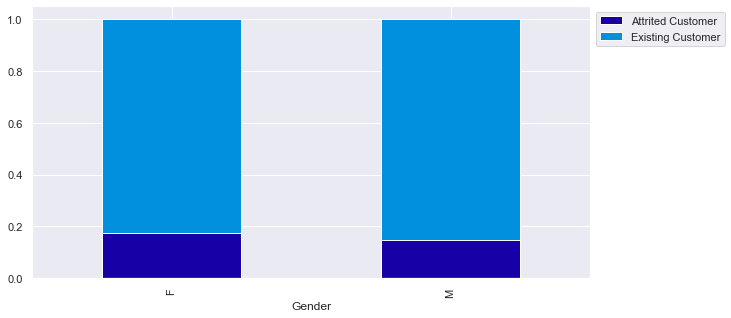

In [45]:
# Run function to create a stacked bar chart 
stacked_plot(df['Gender'])

#### Observations
* Women attrit slightly more than men, but probably not significantly

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
----------------------------------------------------------------------


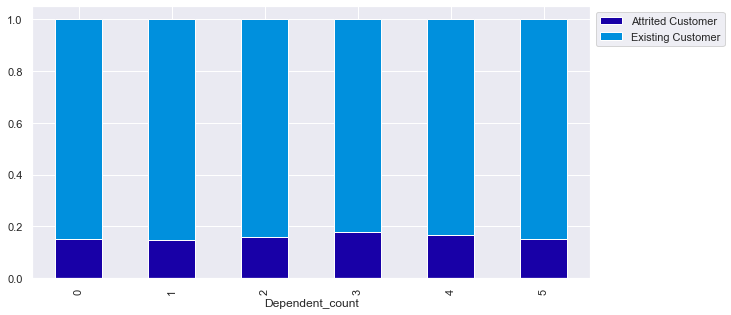

In [46]:
stacked_plot(df['Dependent_count'])

#### Observations
* No significant difference by number of dependents

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
----------------------------------------------------------------------


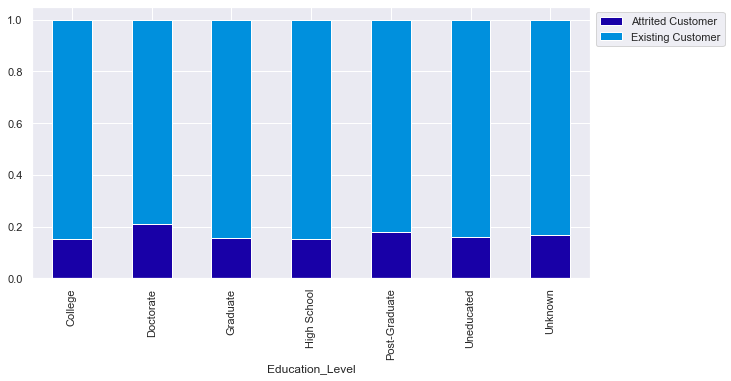

In [47]:
stacked_plot(df['Education_Level'])

#### Observations
* Customers with a Doctorate attrit slightly more frequently, followed by customers with Post-Graduate 

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
----------------------------------------------------------------------


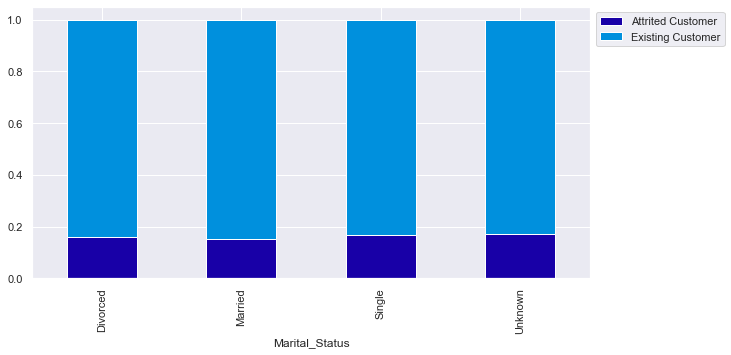

In [48]:
stacked_plot(df['Marital_Status'])

#### Observations
* No significant difference by marital status

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
----------------------------------------------------------------------


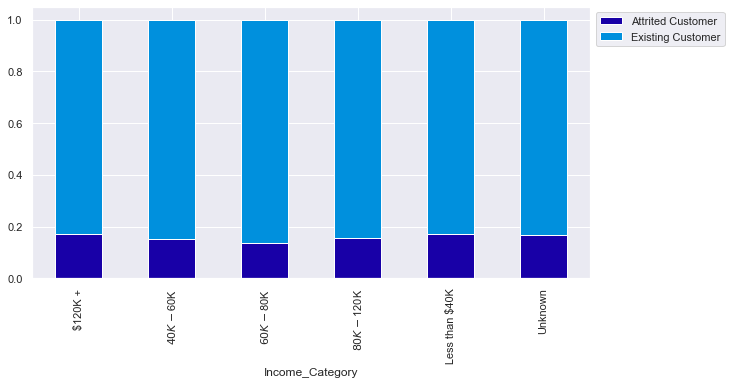

In [49]:
stacked_plot(df['Income_Category'])

#### Observations
* No big differences by income category, but the lowest attrition rate seems to be with customers in the 60k to 80k range

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
----------------------------------------------------------------------


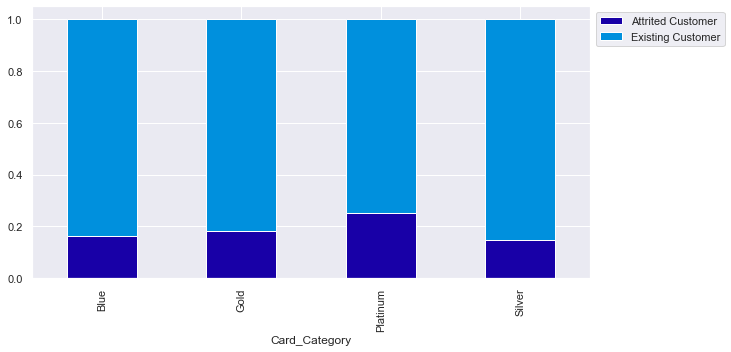

In [50]:
stacked_plot(df['Card_Category'])

#### Observations
* Higher attrition rate for customers with Platinum card, followed by Gold, Blue, and lowest is Silver. 
* Limited data on Platinum customers, though, with only 20 total. 

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
----------------------------------------------------------------------


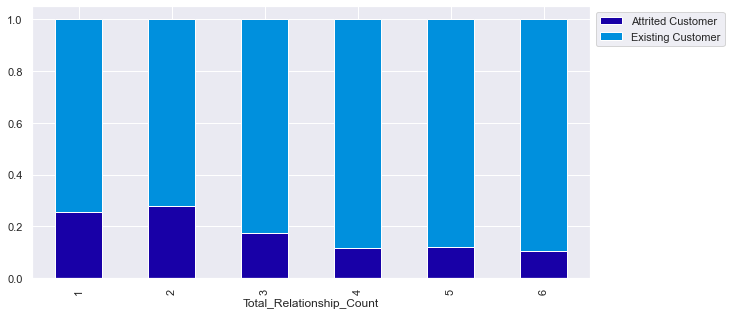

In [51]:
stacked_plot(df['Total_Relationship_Count'])

#### Observations
* Customers with fewer relationships attrit at a higher rate. 
* Customers with 4 to 6 relationships attrit at a lower-than-average rate

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127
----------------------------------------------------------------------


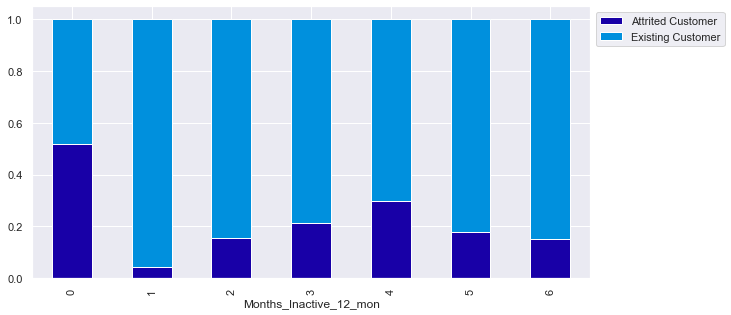

In [52]:
stacked_plot(df['Months_Inactive_12_mon'])

#### Observations
* Surprising that customers who were active all 12 months have a > 50% attrition rate! Limited data, though with only 29 customers in that category
* Customers who were inactive 1 month have a very low attrition rate
* Customers who were inactive 4 months have a higher than average attrition rate (~30%)

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
----------------------------------------------------------------------


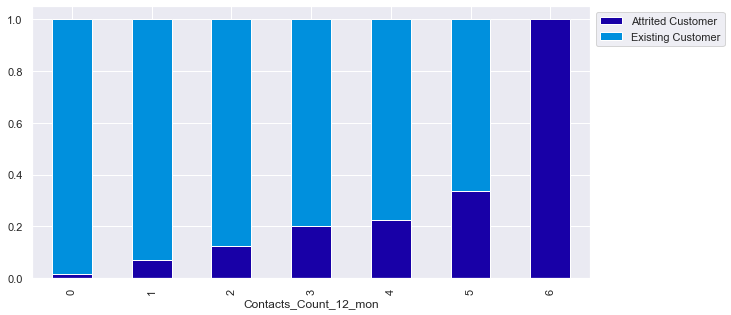

In [53]:
stacked_plot(df['Contacts_Count_12_mon'])

#### Observations
* All customers who were contact 6 times attrited! 
* The more times a customer was contacted, the more likely they were to attrit
* Customers with 0 contacts had a very low (near 0%) attrition rate

### Bivariate Analysis: Box Plots for Target Variable vs. Numeric Columns

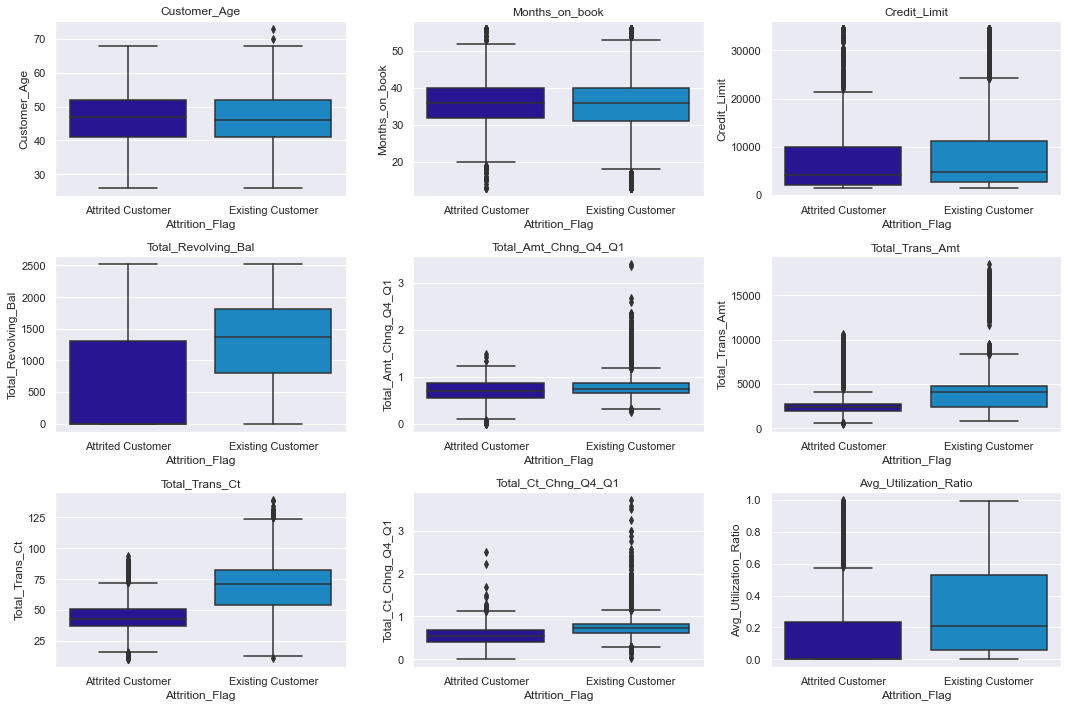

In [54]:
# Create a list of the numeric columns
num_cols = df[
    [
        "Customer_Age",
        "Months_on_book",
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        "Avg_Utilization_Ratio"
    ]
].columns.tolist()

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Function to iteratively create boxplots 
for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = df[target], y = df[variable], data = df)
    plt.tight_layout()
    plt.title(variable)
plt.show()

#### Observations
* There does not seem to be a significant difference between customers who attrited or not with Age, Months on Book, Credit Limit, or Total Amount Change Q4 to Q1. 
* Customers who attrited had a lower:
    + Revolving balance
    + Total transaction amount in the past 12 months
    + Total number of transactions in the past 12 months
    + Transaction count rate (Q4 over Q1) 
    + Average utilization ratio

<a href = #TOC>Back to Top</a>

## <a id = "eda-insights"></a>Summary Insights from EDA

* Customers who were most active (0 inactive months) had the highest attrition rate, and customers who were inactive only 1 month had the lowest attrition rate. This is not intuitive and needs further exploration to understand the driver. 
* It seems that customers who are less active (lower revolving balance, transaction amount, transaction count, and utilization ratio) are more likely to attrit. 
* Contacting customers may make them more likely to attrit (higher contact rate, higher attrition rate) 
* Platinum cardholders (higher-end product) are more likely to attrit.
* Demographic factors like age, gender, income, and so on do not seem to be significant factors in customers' likelyhood to attrit. 

<a href = #TOC>Back to Top</a>

# <a id = "data-pre"></a>3. Data Pre-Processing

## <a id = "feature"></a>Feature Engineering and Data Preparation

* I don't see the need to create any additional features based on the EDA

In [55]:
# Convert attirition categories to integers 
df.replace({'Attrition_Flag': {'Attrited Customer':1, 'Existing Customer':0}}, inplace=True)

In [56]:
# For columns with unknown data, converting categories to integers for Missing Value Treatment
# after splitting into training and test

# First need to replace the word "unknown" with NaN in columns where it appears
df.replace('Unknown', np.nan, inplace=True)

# Confirm replacement worked
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Replace worked, Unknown has been converted to NaN in 3 columns

In [57]:
# Label encode all categorical values to numerical values 
# so KNN can calculate and impute after splitting

gender = {'M':1, 'F':2}
df['Gender']= df['Gender'].map(gender)

education = {'Graduate':1, 'High School':2, 'Uneducated':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
df['Education_Level']= df['Education_Level'].map(education)

marital_status = {'Married':1, 'Single':2, 'Divorced':3}
df['Marital_Status']= df['Marital_Status'].map(marital_status)

income = {'Less than $40K':1, '$40K - $60K':2, '$80K - $120K':3, '$60K - $80K':4, '$120K +':5}
df['Income_Category']= df['Income_Category'].map(income)

card = {'Blue':1, 'Silver':2, 'Gold':3, 'Platinum':4}
df['Card_Category']= df['Card_Category'].map(card)

# Confirm changes were made
df.head()

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
0               0            45      1               3               2   
1               0            49      2               5               1   
2               0            51      1               3               1   
3               0            40      2               4               2   
4               0            40      1               3               3   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0              1               4             1              39   
1              2               1             1              44   
2              1               3             1              36   
3            NaN               1             1              34   
4              1               4             1              21   

  Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
0                        5                      1                     3   
1                        6                      1                     2   
2                        4                      1                     0   
3                        3                      4                     1   
4                        5                      1                     0   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0       12691.0                  777                 1.335             1144   
1        8256.0                  864                 1.541             1291   
2        3418.0                    0                 2.594             1887   
3        3313.0                 2517                 1.405             1171   
4        4716.0                    0                 2.175              816   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0              42                1.625                  0.061  
1              33                3.714                  0.105  
2              20                2.333                  0.000  
3              20                2.333                  0.760  
4              28                2.500                  0.000

* Label encoding worked, all values are numeric and ready for imputer

## <a id = "split"></a>Split Data into Training and Test Sets

In [58]:
# Split the features into X and y, with y as the target column 
X = df.drop(target, axis=1)
y = df[target]

In [59]:
# Split the data into training and test sets
# Using 70/30 split for train/test size
# Set stratify parameter to y because of the imbalance in the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 18) (3039, 18)


* Spiltting 70/30 worked

<a href = #TOC>Back to Top</a>

## <a id = "outlier"></a>Outlier Treatment

This data set does not have any extreme or problematic outliers. Any outliers present are within reason and represent the real world. I am choosing to leave outliers as is.  

## <a id = "missing"></a>Missing Value Treatment

In [60]:
# Create variable for the imputer
imputer = KNNImputer(n_neighbors=5)

In [61]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the test data 
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [62]:
# Check that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1      

* Imputer worked, there are no more null values in Train or Test

In [63]:
# Create function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [64]:
# Map the categorical features back from integers to categories
inverse_mapping(gender,'Gender')
inverse_mapping(education,'Education_Level')
inverse_mapping(marital_status,'Marital_Status')
inverse_mapping(income,'Income_Category')
inverse_mapping(card,'Card_Category')

In [65]:
# Check Train set to confirm inverse mapping worked
inv_cols = X_train.select_dtypes(include=['object','category'])
for i in inv_cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         2253
High School      1949
Uneducated       1435
College           771
Post-Graduate     368
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3499
Single      3087
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2616
$40K - $60K       1511
$80K - $120K      1362
$60K - $80K       1089
$120K +            510
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


* Inverse mapping worked on the Train set and there are no more Unknown values

In [66]:
# Check Test set to confirm inverse mapping worked
inv_cols = X_test.select_dtypes(include=['object','category'])
for i in inv_cols.columns:
    print(X_test[i].value_counts())
    print('*'*30)

F    1588
M    1451
Name: Gender, dtype: int64
******************************
Graduate         987
High School      807
Uneducated       618
College          334
Post-Graduate    154
Doctorate        139
Name: Education_Level, dtype: int64
******************************
Married     1477
Single      1315
Divorced     247
Name: Marital_Status, dtype: int64
******************************
Less than $40K    1116
$40K - $60K        674
$80K - $120K       548
$60K - $80K        471
$120K +            230
Name: Income_Category, dtype: int64
******************************
Blue        2815
Silver       180
Gold          38
Platinum       6
Name: Card_Category, dtype: int64
******************************


* Inverse mapping worked on the Test set and there are no more Unknown values

## Encode Categorical Variables

In [67]:
# Use get_dummies to create dummie columns for each categorical variable
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Print shape of Train and Test sets to confirm column size is the same
print(X_train.shape, X_test.shape)

(7088, 28) (3039, 28)


* Encoding worked, the Train and Test both have 28 columns each now

<a href = #TOC>Back to Top</a>

# <a id = "model"></a>4. Model Building

## <a id = "eval-criteria"></a>Model Evaluation Criteria

#### Model can make wrong predictions as:
* Predicting a customer will cancel their card when they will not (False Pos) - Loss of resources spent trying to retain a customer who will stay anyways
* Predicting a customer will not cancel their card when they will (False Neg) - Loss of revenue when a customer leaves who might have been retained if correctly identified

#### Which case is more important? 
* Predicting that the customer will not cancel when they actually will (False Neg). 
* The company will lose revenue because the customer won't be targeted for marketing efforts, services, etc. when they should have been targeted. 
* Targeting customers who would not cancel anyways is wasteful, but generally a lower cost than losing a customer. 

#### How to reduce False Negatives?
* In this scenario, the company wants to maximize Recall. Greater Recall means lower chances of false negatives.

## Create Scoring Metrics

In [68]:
# Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Create Function for Confusion Matrix

In [69]:
# Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

## <a id = "initial-models"></a>Create Initial Models

In [70]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "AB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss', use_label_encoder=False)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

In [71]:
# Loop through each model to get the mean cross validated score
print("Mean Cross-Validated Recall Score for Each Model on Training Set:")
print("")

for name, model in models:
    scoring = "recall" # As noted above, Recall is the most important metric for this case
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

Mean Cross-Validated Recall Score for Each Model on Training Set:

LR: 58.650204807172116
RF: 79.4535899219414
GB: 83.58180694025815
AB: 83.75801839400262
XGB: 87.00556457222352
DTREE: 80.06762500966073


#### Observations
* With the initial models, XGBoost has the highest average cross-validated recall score
* Logistic Regression is providing the lowest average recall score

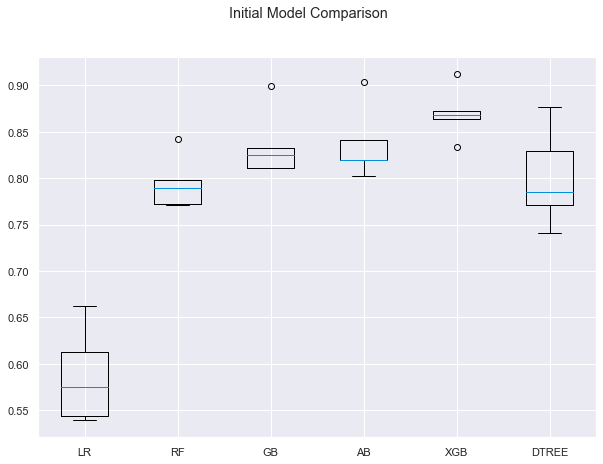

In [72]:
# Create boxplots for CV scores of all initial models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Initial Model Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#### Observations
* XGBoost has the highest average cross-validated recall score and the lowest variance
* LR has comparatively poor performance even when looking at the range of scores
* Gradient Boost, AdaBoost, and XGBoost have the best performance on training set with these initial models. 

## <a id = "imbalance"></a>Treat Imbalances: Logistic Regression

### Logistic Regression: Oversampling (to treat imbalances)

In [74]:
# Print the number of 1s and Os for the target variable in the training set before treatment
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Apply SMOTE to upsample the training set
smt = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_up, y_train_up = smt.fit_resample(X_train, y_train.ravel())

# Print the number of 1s and 0s for target variable after upsampling to confirm increase in 1s
print("After UpSampling, counts of label '1': {}".format(sum(y_train_up==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_up==0)))

# Check the shape of the new training set to confirm the upsampling has been applied
print('After UpSampling, the shape of train_X: {}'.format(X_train_up.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_up.shape))

Before UpSampling, counts of label '1': 1139
Before UpSampling, counts of label '0': 5949 

After UpSampling, counts of label '1': 5949
After UpSampling, counts of label '0': 5949 

After UpSampling, the shape of train_X: (11898, 28)
After UpSampling, the shape of train_y: (11898,) 



In [75]:
# Import Pipeline from imblearn so SMOTE can be part of the pipeline steps
from imblearn.pipeline import Pipeline 

# Create another pipeline and append LR Upsampled model to the list
models.append(
    (
        "LR Upsampled",
        Pipeline(
            steps=[
                ("smote", smt),
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)

results2 = []  # Empty list to store all model's CV scores
names2 = []  # Empty list to store name of the models

In [76]:
# Loop through each model again to get the mean cross validated scores with the new upsampled model
print("Mean Cross-Validated Recall Score for Each Model on Training Set:")
print("")

for name, model in models:
    scoring = "recall" # As noted above, Recall is the most important metric for this case
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results2.append(cv_result)
    names2.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

Mean Cross-Validated Recall Score for Each Model on Training Set:

LR: 58.650204807172116
RF: 79.4535899219414
GB: 83.58180694025815
AB: 83.75801839400262
XGB: 87.00556457222352
DTREE: 80.06762500966073
LR Upsampled: 66.29028518432645


#### Observations
* Upsampling seems to have made an improvement on the mean cross-validated recall score for the LR model, but it still under-performers compared to the other models

### Logistic Regression: Under Sampling (to treat imbalances)

In [77]:
# Define a variable for Random Under Sampling
rus = RandomUnderSampler(random_state = 4)

In [78]:
# Create another pipeline and append LR Under Sampled model to the list
models.append(
    (
        "LR Under Sampled",
        Pipeline(
            steps=[
                ("rand_under_sample", rus),
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)

results3 = []  # Empty list to store all model's CV scores
names3 = []  # Empty list to store name of the models

In [79]:
# Loop through each model again to get the mean cross validated scores with the new under sampled model
print("Mean Cross-Validated Recall Score for Each Model on Training Set:")
print("")

for name, model in models:
    scoring = "recall" # As noted above, Recall is the most important metric for this case
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results3.append(cv_result)
    names3.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

Mean Cross-Validated Recall Score for Each Model on Training Set:

LR: 58.650204807172116
RF: 79.4535899219414
GB: 83.58180694025815
AB: 83.75801839400262
XGB: 87.00556457222352
DTREE: 80.06762500966073
LR Upsampled: 66.29028518432645
LR Under Sampled: 84.54942422134633


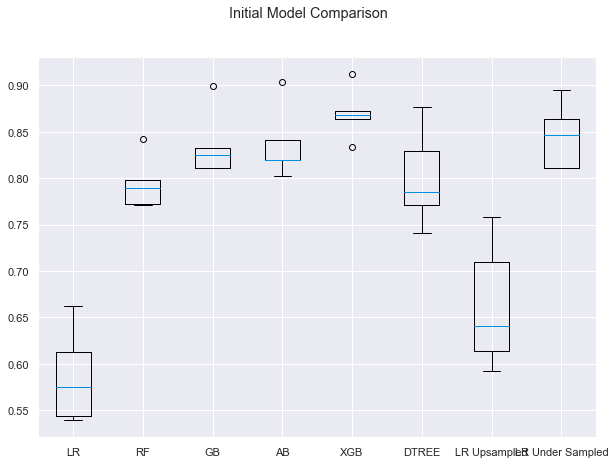

In [80]:
# Create boxplots for CV scores of all initial models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Initial Model Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names3)

plt.show()

#### Observations
* Random under sampling significantly improved the performance of the logistic regression model.
* Random under sampling model now has the 2nd highest mean cv recall score on training set

## Check Initial Models' Performance on Test Set

In [81]:
# Loop through each model again to get the mean cross validated scores with the new under sampled model
print("Mean Cross-Validated Recall Score for Each Model on Test Set:")
print("")

for name, model in models:
    scoring = "recall" # As noted above, Recall is the most important metric for this case
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_test, y=y_test, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

Mean Cross-Validated Recall Score for Each Model on Test Set:

LR: 56.156111929307805
RF: 71.32968651378077
GB: 80.73637702503682
AB: 80.11992425836316
XGB: 86.88617715127288
DTREE: 76.64001683147485
LR Upsampled: 67.82663580896275
LR Under Sampled: 85.65327161792553


### <a id = "reg"></a>Regularization

The models don't appear to be overfitting at this point -- performance is similar between training and test sets. Because of that I'm choosing not to regularize. I will check later after hyperparameter tuning to see if I need to at that time. 

<a href = #TOC>Back to Top</a>

# <a id = "hyperparameter"></a>5. Hyperparameter Tuning
* XGBoost, Logistic Regression Under Sampled, and AdaBoost have the highest average CV recall score
* I will tune those three models to see if performance improves

## Hyperparameter Tuning: Grid Search

### Grid Search: AdaBoost

In [82]:
%%time 

# Creating pipeline
AB_pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV, setting number of jobs to -1 for speed, setting for 5-fold cross validation
grid_cv = GridSearchCV(estimator=AB_pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 90} 
Score: 0.879731818533117
CPU times: user 3.89 s, sys: 505 ms, total: 4.39 s
Wall time: 1min 36s


#### Observations
* Recall score improved from mean CV recall in original model
* Took a little over 2 mins to run GridSearchCV

In [83]:
# Creating new pipeline with best parameters
AB_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=90,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
AB_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.9913939051918735
Accuracy on test set :  0.9726883843369529
Recall on training set :  0.9719051799824407
Recall on test set :  0.9241803278688525
Precision on training set :  0.9744718309859155
Precision on test set :  0.9074446680080482
F1 Score on training set :  0.9731868131868132
F1 Score on test set :  0.9157360406091372


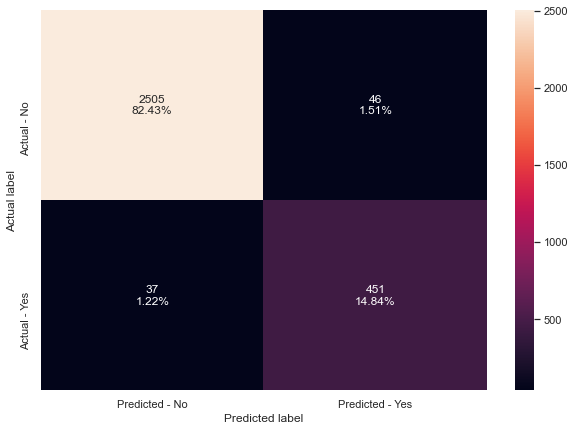

In [84]:
# Calculating different metrics
get_metrics_score(AB_tuned1)

# Creating confusion matrix
make_confusion_matrix(AB_tuned1, y_test)

#### Observations
* Very good recall score on test -- 92... hyperparameter tuning helped improve the metrics a lot. 
* Model might be getting close to overfitting

### Grid Search: XGBoost

In [85]:
%%time 

#Creating pipeline
XGB_pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=1, eval_metric='logloss', use_label_encoder=False))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator = XGB_pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9508501429785918:
CPU times: user 36.8 s, sys: 2.87 s, total: 39.7 s
Wall time: 1h 22min 44s


In [86]:
# Creating new pipeline with best parameters
XGB_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=200,
        scale_pos_weight=10,
        subsample=0.7,
        learning_rate=0.05,
        gamma=5,
        eval_metric='logloss',
        use_label_encoder=False,
    ),
)

# Fit the model on training data
XGB_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=N

Accuracy on training set :  0.9826467268623025
Accuracy on test set :  0.9634748272458046
Recall on training set :  1.0
Recall on test set :  0.9590163934426229
Precision on training set :  0.9025356576862124
Precision on test set :  0.8372093023255814
F1 Score on training set :  0.9487713452728029
F1 Score on test set :  0.8939828080229226


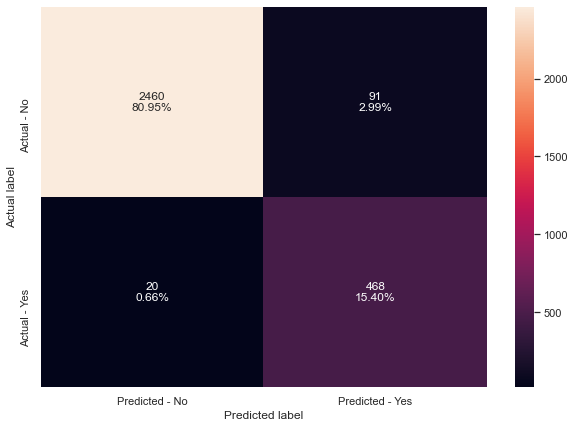

In [87]:
# Calculating different metrics
get_metrics_score(XGB_tuned1)

# Creating confusion matrix
make_confusion_matrix(XGB_tuned1, y_test)

#### Observations
* Took a VERY long time to run the GridSearchCV on XGBoost
* Tuned model performs better, but seems to be overfitting now (1.0 score on Training Recall)

### Grid Search: Logistic Regression Under Sampling

In [88]:
%%time 

#Creating pipeline
LRUnder_pipe = Pipeline(steps=[("rand_under_sample", rus),
                ("scaler", StandardScaler()),
                ("lrclassifier", LogisticRegression(random_state=1))])
    
#Parameter grid to pass in GridSearchCV
param_grid={'lrclassifier__penalty' : ['l1','l2'],
    'lrclassifier__C' : np.logspace(-4, 4, 20),
    'lrclassifier__solver' : ['lbfgs', 'liblinear']}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator = LRUnder_pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'lrclassifier__C': 1.623776739188721, 'lrclassifier__penalty': 'l1', 'lrclassifier__solver': 'liblinear'} with CV score=0.8454826493546642:
CPU times: user 850 ms, sys: 81.1 ms, total: 931 ms
Wall time: 2.7 s


In [89]:
# Creating new pipeline with best parameters
LRUnder_tuned1 = Pipeline(
    steps=[("rand_under_sample", rus),
                ("scaler", StandardScaler()),
                ("lrclassifier", LogisticRegression(
                    random_state=1,
                    C=1.623776739188721,
                    penalty='l1', 
                    solver='liblinear'
                ))])


# Fit the model on training data
LRUnder_tuned1.fit(X_train, y_train)

Pipeline(steps=[('rand_under_sample', RandomUnderSampler(random_state=4)),
                ('scaler', StandardScaler()),
                ('lrclassifier',
                 LogisticRegression(C=1.623776739188721, penalty='l1',
                                    random_state=1, solver='liblinear'))])

Accuracy on training set :  0.8452313769751693
Accuracy on test set :  0.8390918065153011
Recall on training set :  0.8498683055311677
Recall on test set :  0.8524590163934426
Precision on training set :  0.5110876451953538
Precision on test set :  0.49939975990396157
F1 Score on training set :  0.6383119024068579
F1 Score on test set :  0.6298258894776685


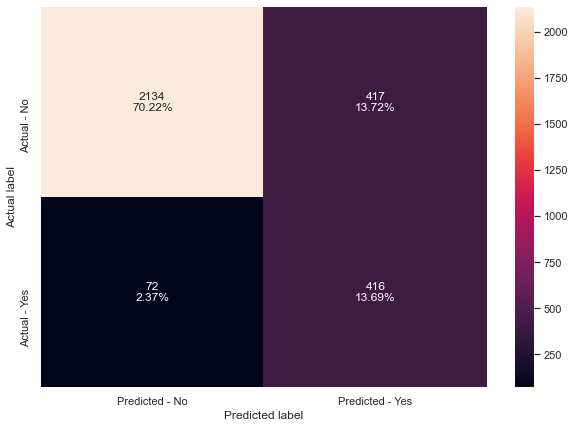

In [90]:
# Calculating different metrics
get_metrics_score(LRUnder_tuned1)

# Creating confusion matrix
make_confusion_matrix(LRUnder_tuned1, y_test)

#### Observations
* Hyperparameter tuning picked a different solver than the default, a penalty, and C value
* Performance did not improve significantly

## Hyperparameter Tuning: Randomized Search

### Randomized Search: AdaBoost

In [91]:
%%time

# Creating pipeline
AB_pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=AB_pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.879731818533117:
CPU times: user 2.05 s, sys: 110 ms, total: 2.16 s
Wall time: 31.9 s


In [92]:
# Creating new pipeline with best parameters
AB_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=90,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
AB_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.9913939051918735
Accuracy on test set :  0.9726883843369529
Recall on training set :  0.9719051799824407
Recall on test set :  0.9241803278688525
Precision on training set :  0.9744718309859155
Precision on test set :  0.9074446680080482
F1 Score on training set :  0.9731868131868132
F1 Score on test set :  0.9157360406091372


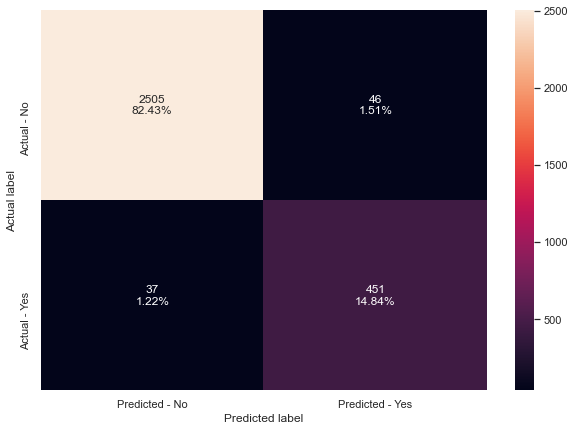

In [93]:
# Calculating different metrics
get_metrics_score(AB_tuned2)

# Creating confusion matrix
make_confusion_matrix(AB_tuned2, y_test)

#### Observations
* RandomSearchCV selected the same parameters through hypertuning as GridSearchCV
* Speed was much faster: 37 seconds vs. over 2 mins for GridSearchCV

### Randomized Search: XGBoost

In [94]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50, use_label_encoder=False))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 5} with CV score=0.9631385733055104:
CPU times: user 13min 59s, sys: 3.43 s, total: 14min 3s
Wall time: 1min 46s


In [95]:
# Creating new pipeline with best parameters
XGB_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=100,
                scale_pos_weight=10,
                gamma=5,
                subsample=0.8,
                learning_rate= 0.2,
                eval_metric='logloss', 
                max_depth = 2, 
                reg_lambda = 10,
                use_label_encoder=False
            ),
        ),
    ]
)
# Fit the model on training data
XGB_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=10, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

Accuracy on training set :  0.9376410835214447
Accuracy on test set :  0.9272787101020072
Recall on training set :  0.9885864793678666
Recall on test set :  0.9713114754098361
Precision on training set :  0.7241157556270097
Precision on test set :  0.6960352422907489
F1 Score on training set :  0.8359317000742391
F1 Score on test set :  0.8109495295124037


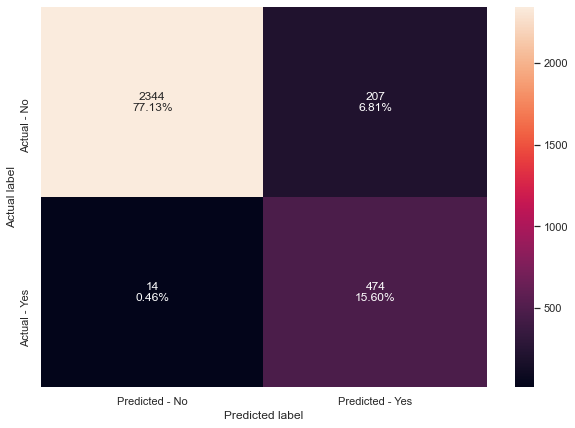

In [96]:
# Calculating different metrics
get_metrics_score(XGB_tuned2)

# Creating confusion matrix
make_confusion_matrix(XGB_tuned2, y_test)

#### Observations
* Better performance compared to GridSearchCV for Recall on Test, and less overfitting on Train
* Only took 2 mins, where GridSearchCV took 1hr 45mins

### Randomized Search: Logisitic Regression Under Sampling

In [97]:
%%time 

#Creating pipeline
LRUnder_pipe = Pipeline(steps=[("rand_under_sample", rus),
                ("scaler", StandardScaler()),
                ("lrclassifier", LogisticRegression(random_state=1))])
    
#Parameter grid to pass in GridSearchCV
param_grid={'lrclassifier__penalty':['l1', 'l2'],'lrclassifier__C':np.logspace(-4, 4, 20),
            'lrclassifier__solver':['lbfgs', 'liblinear']}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
randomized_cv = RandomizedSearchCV(estimator = LRUnder_pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in GridSeachCV
randomized_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'lrclassifier__solver': 'liblinear', 'lrclassifier__penalty': 'l2', 'lrclassifier__C': 206.913808111479} with CV score=0.8446054563722081:
CPU times: user 535 ms, sys: 52.8 ms, total: 587 ms
Wall time: 1.64 s


In [98]:
# Creating new pipeline with best parameters
LRUnder_tuned2 = Pipeline(
    steps=[("rand_under_sample", rus),
                ("scaler", StandardScaler()),
                ("lrclassifier", LogisticRegression(
                    random_state=1, 
                    penalty= 'l2', 
                    C= 206.913808111479, 
                    solver='liblinear'))])

# Fit the model on training data
LRUnder_tuned2.fit(X_train, y_train)

Pipeline(steps=[('rand_under_sample', RandomUnderSampler(random_state=4)),
                ('scaler', StandardScaler()),
                ('lrclassifier',
                 LogisticRegression(C=206.913808111479, random_state=1,
                                    solver='liblinear'))])

Accuracy on training set :  0.8463600451467269
Accuracy on test set :  0.8384336952945047
Recall on training set :  0.8498683055311677
Recall on test set :  0.8545081967213115
Precision on training set :  0.513255567338282
Precision on test set :  0.4982078853046595
F1 Score on training set :  0.6399999999999999
F1 Score on test set :  0.629433962264151


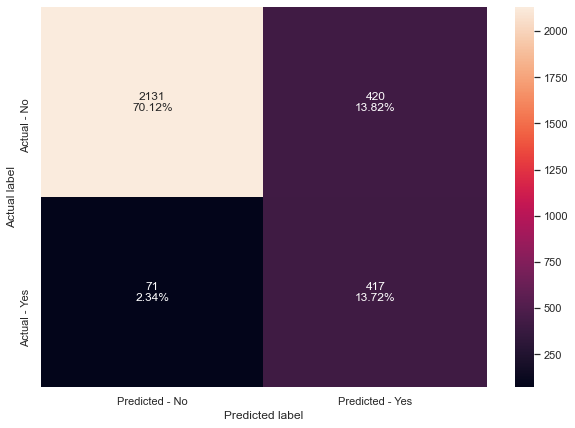

In [99]:
# Calculating different metrics
get_metrics_score(LRUnder_tuned2)

# Creating confusion matrix
make_confusion_matrix(LRUnder_tuned2, y_test)

#### Observations
* Different parameters selected with RandomSearchCV than GridSearchCV (C is much different)
* Performance between the two is similar

<a href = #TOC>Back to Top</a>

# <a id = "performance"></a>6. Model Performance Evaluation

### Comparison Dataframe

In [100]:
# defining list of models
models = [AB_tuned1, AB_tuned2, XGB_tuned1, XGB_tuned2, LRUnder_tuned1, LRUnder_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [101]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "AdaBoost with GridSearchCV",
            "AdaBoost with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "LR Under Sampled with GridSearchCV",
            "LR Under Sampled with RandomizedSearchCV"
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
3           XGBoost with RandomizedSearchCV        0.937641       0.927279   
2                 XGBoost with GridSearchCV        0.982647       0.963475   
0                AdaBoost with GridSearchCV        0.991394       0.972688   
1          AdaBoost with RandomizedSearchCV        0.991394       0.972688   
5  LR Under Sampled with RandomizedSearchCV        0.846360       0.838434   
4        LR Under Sampled with GridSearchCV        0.845231       0.839092   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
3      0.988586     0.971311         0.724116        0.696035  
2      1.000000     0.959016         0.902536        0.837209  
0      0.971905     0.924180         0.974472        0.907445  
1      0.971905     0.924180         0.974472        0.907445  
5      0.849868     0.854508         0.513256        0.498208  
4      0.849868     0.852459         0.511088        0.499400

#### Observations
* XGBoost tuned through RandomizedSearchCV is providing the best performance on Recall, but is lower on Precision
* AdaBoost tuned with GridSearchCV is providing very good Recall and also very good Precision -- it's likely the better model in overall performance

<a href = #TOC>Back to Top</a>

# <a id = "conclusion"></a>7. Conculsion and Business Recommendations

## Feature Importance

### XGBoost RandomizedSearchCV

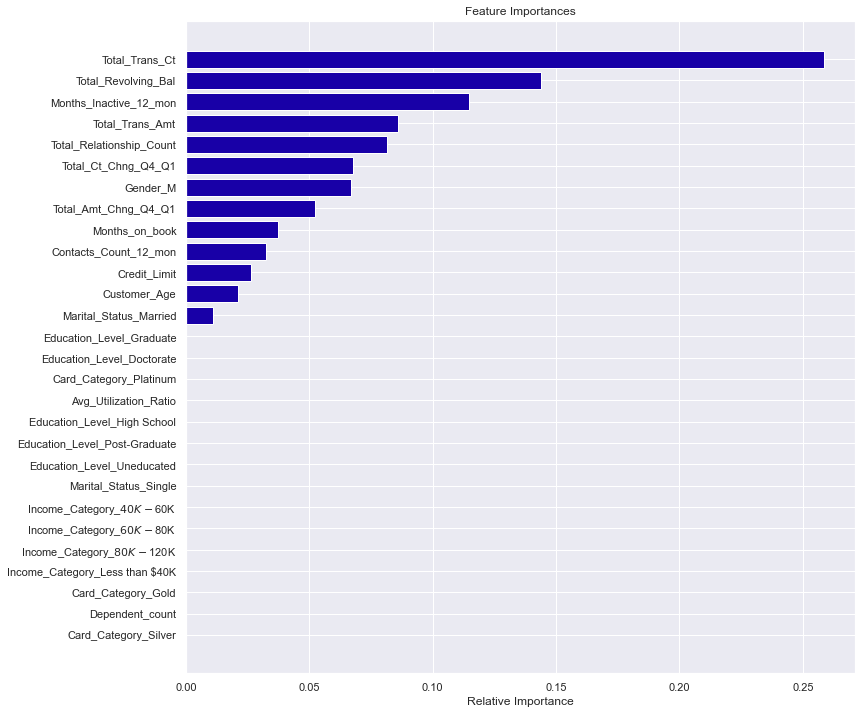

In [102]:
# Define values for a feature importance chart
feature_names = X_train.columns
importances = XGB_tuned2[1].feature_importances_
indices = np.argsort(importances)

# Create the chart
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### AdaBoost GridSearchCV

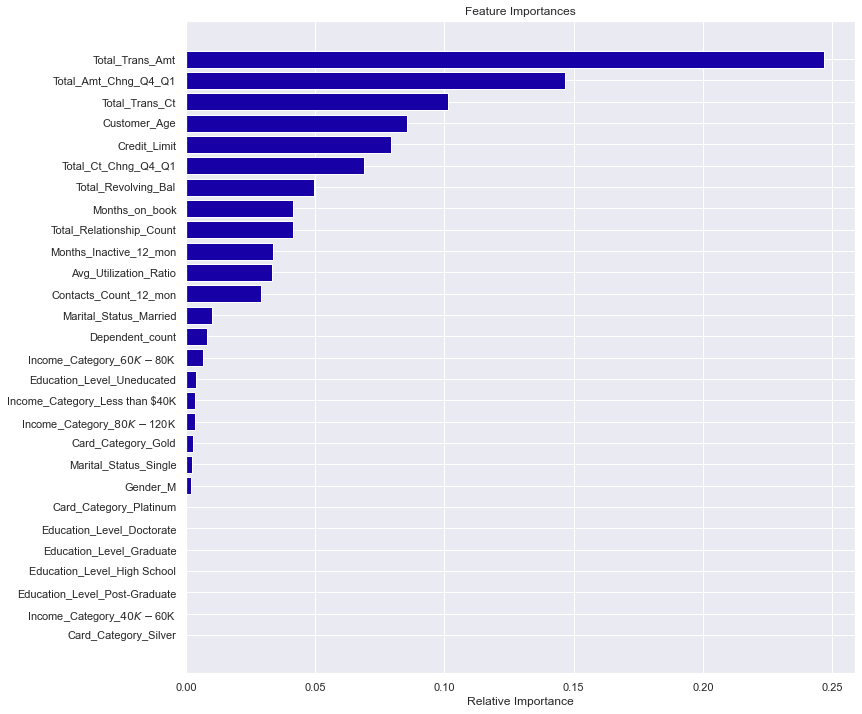

In [103]:
feature_names = X_train.columns
importances = AB_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
* The two models have different Feature Importances in the top 5
* Total_Trans_Ct and Total_Trans_Amt are the only features in the top 5 of both models. 

### Coefficients of the Logistic Regression Undersampled Model

In [104]:
#Find the coefficients for the Logisitic Regression Undersampled model tuned with RandomizedSearchCV

log_odds = LRUnder_tuned2[2].coef_[0]
LR_coef = pd.DataFrame(log_odds, X_train.columns, columns=['coef'])
LR_coef.sort_values(by=['coef']) #Sort by the coefficients

coef
Total_Trans_Ct                 -3.001889
Total_Revolving_Bal            -0.749740
Total_Ct_Chng_Q4_Q1            -0.692047
Total_Relationship_Count       -0.612708
Gender_M                       -0.314461
Income_Category_$40K - $60K    -0.272575
Income_Category_Less than $40K -0.189300
Customer_Age                   -0.185525
Income_Category_$60K - $80K    -0.172410
Income_Category_$80K - $120K   -0.144512
Avg_Utilization_Ratio          -0.122291
Education_Level_Graduate       -0.076266
Total_Amt_Chng_Q4_Q1           -0.071773
Credit_Limit                   -0.067158
Marital_Status_Married         -0.066153
Card_Category_Platinum         -0.045429
Education_Level_High School    -0.026051
Education_Level_Doctorate      -0.000978
Education_Level_Uneducated      0.003821
Card_Category_Silver            0.066092
Marital_Status_Single           0.089039
Education_Level_Post-Graduate   0.103704
Months_on_book                  0.118991
Dependent_count                 0.157852
Card_Category_Gold              0.175281
Months_Inactive_12_mon          0.555356
Contacts_Count_12_mon           0.602444
Total_Trans_Amt                 1.701215

In [105]:
odds = np.exp(np.abs(log_odds))-1
#pd.set_option('display.max_rows',None)
LR_odds = pd.DataFrame(odds, X_train.columns, columns=['Change in odds'])
LR_odds.sort_values(by=['Change in odds'], ascending=False) #Sort by the change in odds

Change in odds
Total_Trans_Ct                       19.123519
Total_Trans_Amt                       4.480600
Total_Revolving_Bal                   1.116450
Total_Ct_Chng_Q4_Q1                   0.997802
Total_Relationship_Count              0.845423
Contacts_Count_12_mon                 0.826578
Months_Inactive_12_mon                0.742561
Gender_M                              0.369521
Income_Category_$40K - $60K           0.313342
Income_Category_Less than $40K        0.208403
Customer_Age                          0.203850
Card_Category_Gold                    0.191581
Income_Category_$60K - $80K           0.188165
Dependent_count                       0.170993
Income_Category_$80K - $120K          0.155475
Avg_Utilization_Ratio                 0.130083
Months_on_book                        0.126359
Education_Level_Post-Graduate         0.109272
Marital_Status_Single                 0.093123
Education_Level_Graduate              0.079250
Total_Amt_Chng_Q4_Q1                  0.074411
Credit_Limit                          0.069465
Marital_Status_Married                0.068391
Card_Category_Silver                  0.068325
Card_Category_Platinum                0.046477
Education_Level_High School           0.026393
Education_Level_Uneducated            0.003828
Education_Level_Doctorate             0.000979

#### Observations
* Logisitic Regression model aligns with feature importance from XGBoost and AdaBoost
* LR model also finds total transaction amount and total transaction count are important
* LR model shows how importan Total_trans_ct is. For every one-unit increase in the total transaction count over 12 months, we expect to see a 1,912% decrease in the odds of a customer leaving. Said another way, the lower the transaction count, the lower the odds of attriting.
* For every one-unit increase in total transaction amount, we expect to see a 448% increase in the odds of a customer leaving. 
* If I had more time, I would likely try dropping more of the features to see if I could improve the model further since so many of them have relatively small coefficients. 

## Insights and Business Recommendations

As we saw in the EDA, customers who attrited had a lower:
* Revolving balance
* Total transaction amount in the past 12 months
* Total number of transactions in the past 12 months
* Transaction count rate (Q4 over Q1)
* Average utilization ratio

The models support the importance of these features. The models also support what we saw in the EDA that demographic features, such as education level, marital status, and income category, have little impact. 

The LR model helps validate that more contacts leads to higher chances of a customer attriting. It also shows that customers with higher total transaction amounts in 12 months are more likely to attrit. 

Interestingly, total transaction count in 12 months has an inverse relationship, so higher transaction counts decrease the likelihood of a customer leaving. 

It seems important for retention that customers make a lot of small transactions. This likely represents customers who are visiting often and buying a few things at a time. The business should look for ways to encourage customers to use the card as their everyday spending card. Pehaps offer rewards for number of transactions, campaigns with transaction goals to earn things, or better interest rates with higher transaction counts, etc. 

Additionally, customers who maintain a higher revolving balance are more likely to stay. The bank could consider lowering interest rates to encourage people to carry a balance. Frequent transactions will likely increase revolving balances, too, so the previous recommendations might help with this as well. 

Contacting customers frequently seems to backfire. The bank should avoid contacting customers and look for alternative ways to stay in touch. Consider establishing a stronger social media presence, advertising more, or running a good content marketing campaign to encourage continued engagement without cold-calling and causing customers to leave. 

For some reason, customers who spend a lot of money on the card in a 12 month period are more likely to leave. We should identify these "big spenders" and do some user research on them to understand why they are leaving. Perhaps something about our product is causing bigger spenders frustration. Or perhaps bigger spenders are leaving because our competitors are offering something that appeals to them, etc. 

<a href = #TOC>Back to Top</a>